In [1]:
# let us install kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# This block is used for uploading the api key associated with my account
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 74 bytes


In [3]:
# This block shows some of the datasets
# it is just proving that the api key worked
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           7665        235  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09            616         29  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           1714         59  1.0              
evangower/premier-league-match-data                            Pr

In [9]:
# Download the dataset you need
!kaggle datasets download -d pankeshpatel/homepricesmultiplevariables

  0% 0.00/252 [00:00<?, ?B/s]
100% 252/252 [00:00<00:00, 180kB/s]


In [4]:
# Mount with google drive if necessary
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from zipfile import ZipFile
#Extracting the dataset contents
zipFilePath='/content/homepricesmultiplevariables.zip'
zipFileObj=ZipFile(file=zipFilePath)
zipFileObj.extractall('/tmp/dataset')

In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [12]:
df = pd.read_csv('/tmp/dataset/homeprices.csv')
df 

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [14]:
# Check if any null values exists
df.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [13]:
df.bedrooms.median()

4.0

In [15]:
# as null value exists, we fill it with the median value
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


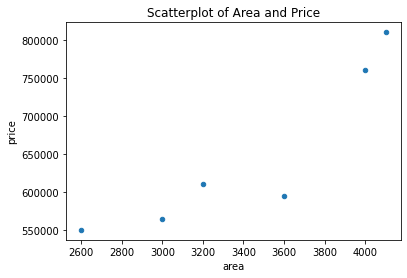

In [16]:
# plot a graph of regression
df.plot.scatter(x='area',y='price',title='Scatterplot of Area and Price')

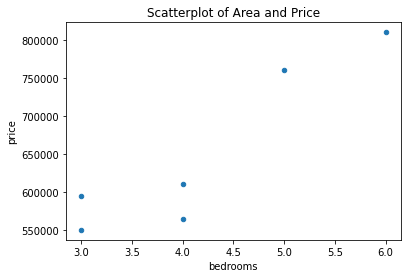

In [17]:
# plot a graph of regression
df.plot.scatter(x='bedrooms',y='price',title='Scatterplot of Area and Price')

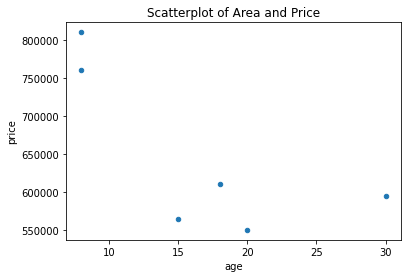

In [18]:
# plot a graph of regression
df.plot.scatter(x='age',y='price',title='Scatterplot of Area and Price')

[Text(0.5, 1.0, 'Box Plot of Scores')]

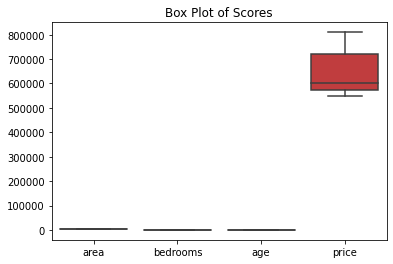

In [37]:
import seaborn as sns
sns.boxplot(data=df).set(title="Box Plot of Scores")  # detect outliers
# can also check individually with 
# sns.boxplot(data=df['area']).set(title="Box Plot of Scores") 

# Here, no outliers were detected

In [30]:
# create the regression model
reg = linear_model.LinearRegression() 
# train the model by considering price as label and others as features
reg.fit(df.drop('price',axis='columns'),df.price) 

LinearRegression()

In [31]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [32]:
reg.intercept_

221323.00186540396

In [44]:
y_pred=reg.predict([[3000, 3, 40]])  # predict the given test data with the model
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])

In [45]:
y_test=112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384   # actual value
y_test

498408.25157402386

In [50]:
y_test=[y_test] # converted the value to an array
y_test

[array(498408.25157402)]

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
# error calculation
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse) # finds the root mean square error

In [52]:
print(mae)
print(mse)
print(rmse)

6.282818503677845e-06
3.9473808350156715e-11
6.282818503677845e-06
